## Основная литература 
1. ШАД: Лекции по Баессовским методам в машинном обучении .
2. Barber D. Bayesian Reasoning and Machine Learning. Cambridge University Press, 2012.
3. Murphy K.P. Machine Learning: A Probabilistic Perspective. The MIT Press, 2012.



## План


* Cопряженные распределения, экспоненциальные распределения ~ 20m
* Вывод и обсуждение EM алгоритма ~ 30m
* Примеры
    + Смесь распределений  ~ 30 m
    + PCA  ~ 10 m
    
   


## Вывод EM алгоритма

**Задача 1.** По выборке $X$ восстановить параметры $\theta$ распределения (методом максимальноого правдоподобия):


$$p(X\;|\;\theta) \rightarrow \max_\theta$$




**Вопрос.** В каких параметрических семействах эту задачу можно решить эффективно?


**Ответ.** Эскпоненциальный класс распределенеий
* Решается явно (часто)
* Решается численно (целевая функция вогнутая)

## Вывод EM алгоритма
1. Вписывать распределение выборки, которая пришла из более сложного распределения в экспоненциальный класс
    + Плохо описывает реальные данные 
    - Легко считается 
2. Работать с более сложными семействами распределений
    + Хорошо описывает реальные данные 
    - Плохо считается (процесс нахождения максимума может сходится слишком долго)



## Вывод EM алгоритма

**Пример.** Рассмотрим следующую одномерную выборку:


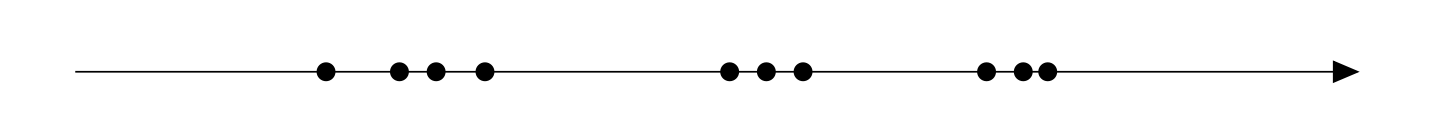

## Вывод EM алгоритма

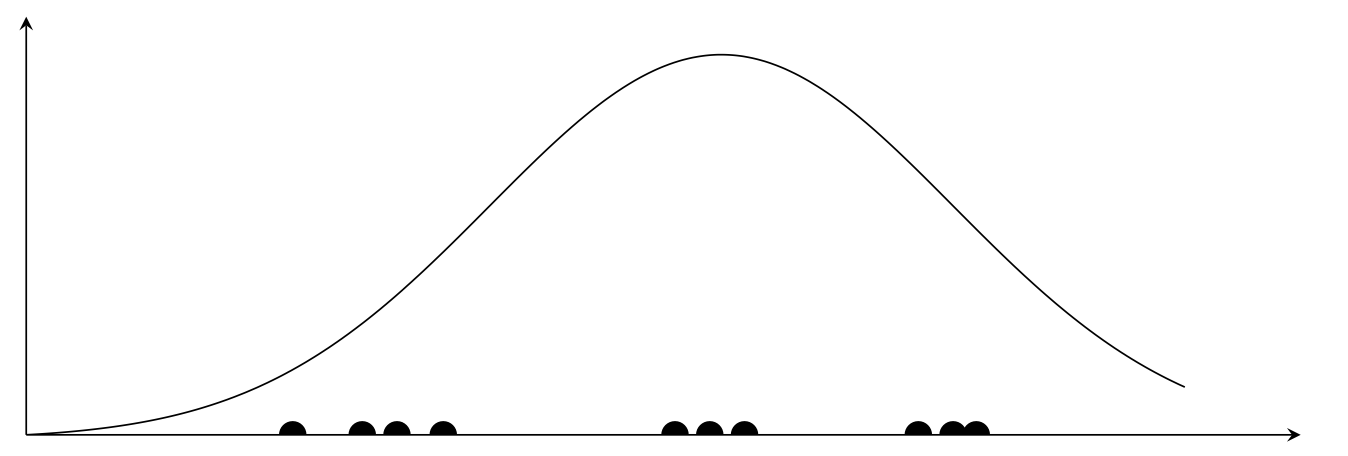

In [14]:
# <img src="https://media.tenor.com/y4Ie8h0H-TwAAAAC/cat-typing.gif" />


## Вывод EM алгоритма

**Идея** использовать смесь нормальных распределений

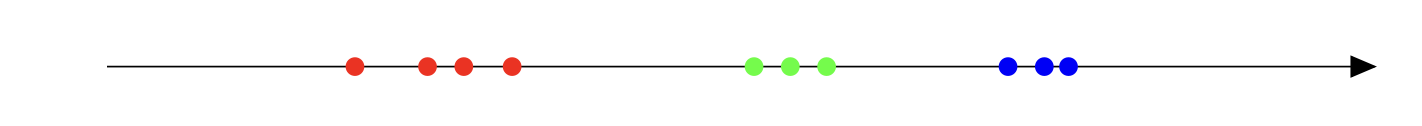

## Вывод EM алгоритма

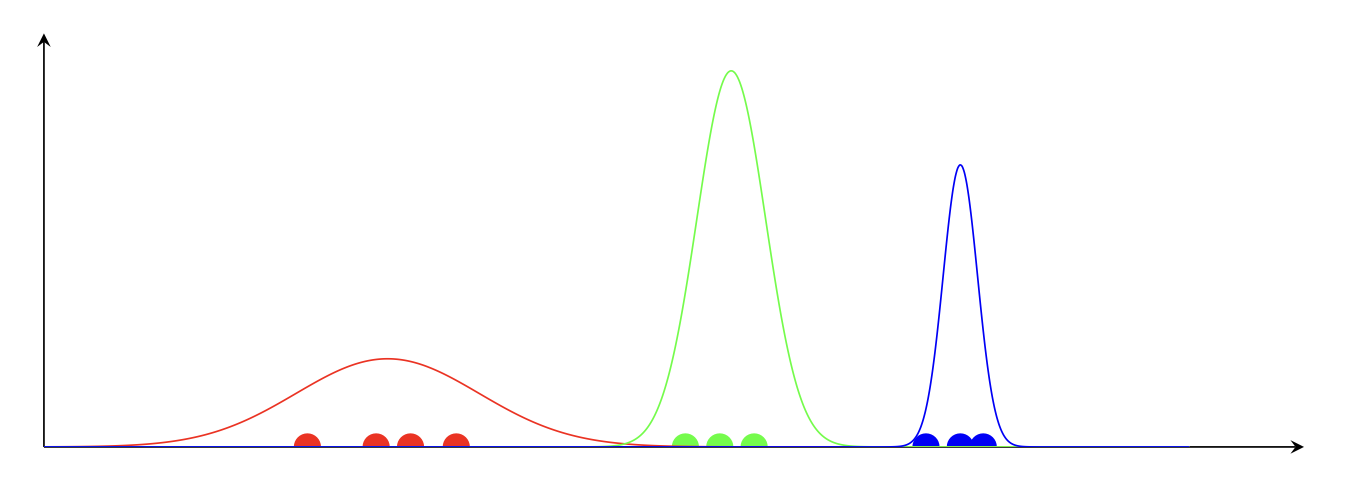

In [15]:
# <img src="https://media.tenor.com/06026DSpi60AAAAM/happy-cat.gif" />

## Вывод EM алгоритма
**Проблемы**



1. Нет информации о принадлежности наблюдений к гаусианам (нет цветов)

2. Смесь нормальных распределений не лежит в экспоненциальном семействе

## Вывод EM алгоритма

**Утверждение:**
Для любого распределения не из экспоненциального класса существуют дополнительные (латентные) случайные величины так что совместное распределение на исходные и латентные переменные будет лежать в экспоненциальном классе




## Вывод EM алгоритма

**Задача 2.** Введём латентные переменные $Z$ так, чтобы совместное распределение $p(X ,\mathbf{z} \;|\; \theta)$ лежало в экспоненциальном классе. Вместо решения исходной задачи которую мы теперь будем называть задачей максимизации **неполного правдоподобия** будем решать задачу:

$$p(Х, Z\;|\;\theta) \rightarrow \max_\theta$$

## Вывод EM алгоритма

**Определение.** *Дивергенция Кульбака-Лейблера* между двумя распределениями $p, q$ опрередяется следующим образом:

$$ KL(p(x)||q(x)) = \int p(x) \log  \frac{p(x)}{q(x)} dx$$

**Свойства.**


1. $ KL(p(x)||q(x)) \geq 0$

2. $ KL(p(x)||q(x)) = 0 \Longleftrightarrow p(x) \sim q(x)\text{ }. \$

## Вывод EM алгоритма

Вернемся к задаче неполного правдободопия.

$$\log p(X\;|\;\theta) = \int q(\mathbf{z})\log p(X\;|\;\theta)d\mathbf{z} = 
$$



$$= \int q(\mathbf{z}) \log \frac{p(X,\mathbf{z}\;|\;\theta)}{p(\mathbf{z}\;|\;X,\theta)} d\mathbf{z} = $$



$$= \int q(\mathbf{z})\log\left[ \frac{p(X,\mathbf{z}\;|\;\theta)}{p(X,\mathbf{z}\;|\;\theta)}\frac{q(\mathbf{z})}{q(\mathbf{z})}\right]d\mathbf{z} =$$

$$= \int q(\mathbf{z}) \log \frac{p(X,\mathbf{z}\;|\;\theta)}{q(\mathbf{z})}d\mathbf{z} + \int q(Z)\log\frac{q(\mathbf{z})}{p(\mathbf{z}|X,\theta)}d\mathbf{z}=$$




$$= \mathcal{L}(q,\theta) + KL(q(\mathbf{z})||p(\mathbf{z}|X,\theta)) \geq \mathcal{L}(q,\theta)$$

## Вывод EM алгоритма

Имеем:

1. $\log p(X\;|\;\theta) \geq \mathcal{L}(q,\theta),\text{ для всех } q(Z).$

2. Для любого $\theta$ cуществует $q_0$, такое, что $\log p(X\;|\;\theta) = \mathcal{L}(q_0,\theta)$

Такая оценка имеет название **нижней вариационной оценки**.

## Вывод EM алгоритма
Это обстоятельство позволяет нам заместо логарифма неполного правдободобия оптимизировать вариационную нижнюю оценку. Оптимизация этой оценки с помощью блочно итерационного процесса

## Вывод EM алгоритма

**Основные шаги:**


* оптимизировать по $q$ при фиксированном $\theta$ (E-step):

$$\mathcal{L}(q,\theta_0) \rightarrow \max_q \Longrightarrow q(\mathbf{z}) = p(\mathbf{z}\;|\;X,\theta)$$



* оптимизировать по $\theta$ при фиксированном $q$ (M-step):

$$\mathcal{L}(q_0,\theta) \rightarrow \max_\theta \Longrightarrow \int q(\mathbf{z}) \log p(X,\mathbf{z}\;|\;\theta) d\mathbf{z} \rightarrow \max_\theta $$

## Обсуждение EM алгоритма

**Вопрос** Что делать, если невозможно аналитически посчитать апостериорное распредление $p(\mathbf{z}\;|\; X, \theta))$ на $E$-шаге?

## Обсуждение EM алгоритма


**Ответ** В этом случае Е-шаг выполняется приближенно.

$$q(\mathbf{z}) = \arg\min_{q\in Q} KL(q(\mathbf{z})\;||\;p(\mathbf{z}\;|\;X,\theta)),$$

где $Q$ — некоторое параметрическое семейство, в котором мы ищем оптимальное $q(\mathbf{z})$.

## Обсуждение EM алгоритма

Пример. $Q = \Delta$, где $\Delta$ – семейство всевозможных $\delta$-функций.


$$\int \delta(\mathbf{z}-\mathbf{z_0})\log \frac{\delta((\mathbf{z}-\mathbf{z_0})}{p(\mathbf{z}\;|\;X,\theta)}d\mathbf{z} \rightarrow \min_{\mathbf{z_0}}$$

$$C - \int \delta(\mathbf{z}-\mathbf{z_0})\log p(\mathbf{z}\,|\,X,\theta)d\mathbf{z} \rightarrow \min_{\mathbf{z_0}} $$


$$\log p(\mathbf{z_0}\,|\,X,\theta) \rightarrow \max_{\mathbf{z_0}}$$

## Обсуждение EM алгоритма

Т.е. «байесовский вывод для бедных» является приближением апостериорного распределением с помощью дельта-функции.

## Обсуждение EM алгоритма

**Вопрос.** Что можно сказать про M-шаг? На первый взгляд, максимизируется какое-то матожидание, какой-то интеграл, который может даже не взяться. Что делать?


## Обсуждение EM алгоритма

**Ответ** Вспомним, что  $\log p(X,\mathbf{z} \,|\, \theta)$ вогнутая по θ функция (мы так вводили скрытые переменные $Z$). Однако мы оптимизируем не её саму а её матожидание. Матожидание вогнутой функции — функция также вогнутая. Таким образом, даже если аналитическая оптимизация такого выражения невозможна, то численно всегда возможна и эффективна.


## Примеры. Разделение смеси распределений.



Пусть $\pi = (\pi_1,\ldots,\pi_n)$ - выпуклая комбинация, т.е.

1. $\sum_{i=1}^n \pi_i = 1$

2. $\pi_i  \geq 0$для всех $i$.

## Примеры. Разделение смеси распределений. 

Пусть распределение выборки является смесью, т.е. 
$$p(x\,|\,\theta,\pi) = \sum_{k=1}^n \pi_k p_k(x\,|\,\theta),$$
где $p_k$ - распределение соответсвующее $k$-ой компоненте смеси.



## Примеры. Разделение смеси распределений. 

Возникает следующая задача

$$p(X\,|\,\theta, \pi) \rightarrow \max_{\theta,\pi}$$

## Примеры. Разделение смеси распределений. 

Введем латентные переменые $Z$ так, что:

$$p(x,z\,|\,\theta,\pi) = \prod_k \left[\pi_k p_k(x\,|\,\theta)\right]^{I(z = k)}$$



## Примеры. Разделение смеси распределений. Смесь нормальных распределений.


In [16]:
try:
    import probml_utils.gmm_lib as gmm_lib
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils.gmm_lib as gmm_lib
import numpy as np
import matplotlib.pyplot as plt
import probml_utils as pml
from matplotlib.colors import ListedColormap
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/probml/probml-data/main/data/faithful.txt"
response = requests.get(url)
rawdata = BytesIO(response.content)


def create_colormap():
    N = 256
    vals = np.ones((N, 4))

    vals[:, 0] = np.linspace(31 / 256, 214 / 256, N)
    vals[:, 1] = np.linspace(119 / 256, 39 / 256, N)
    vals[:, 2] = np.linspace(180 / 256, 40 / 256, N)
    cmap = ListedColormap(vals)
    return cmap


def gaus_mix_plot(hist_index=None):
    cmap = create_colormap()
    X = np.loadtxt(rawdata)
    # Normalise data
    X = (X - X.mean(axis=0)) / (X.std(axis=0))
    mu1 = np.array([-1.5, 1.5])
    mu2 = np.array([1.5, -1.5])

    # Initial configuration
    Sigma1 = np.identity(2) * 0.1
    Sigma2 = np.identity(2) * 0.1
    pi = [0.5, 0.5]
    mu = [mu1, mu2]
    Sigma = [Sigma1, Sigma2]

    res = gmm_lib.apply_em(X, pi, mu, Sigma)

    # Create grid-plot
    if hist_index is None:
        hist_index = [0,5,10,20,30,40]
    
    n= len(hist_index) // 3 
    
    fig, ax = plt.subplots(n, 3)
    ax = ax.ravel()
    for ix, axi in zip(hist_index, ax):
        pi, mu, Sigma = res["coeffs"][ix]
        r = res["rvals"][ix]
        if ix == 0:
            r = np.ones_like(r)

        colors = cmap if ix > 0 else "Dark2"
        gmm_lib.plot_mixtures(X, mu, pi, Sigma, r, cmap=colors, ax=axi)
        axi.set_title("Iteration {ix}".format(ix=ix))

    plt.tight_layout()
    pml.savefig("gmm_faithful.pdf", dpi=300)
    plt.show()

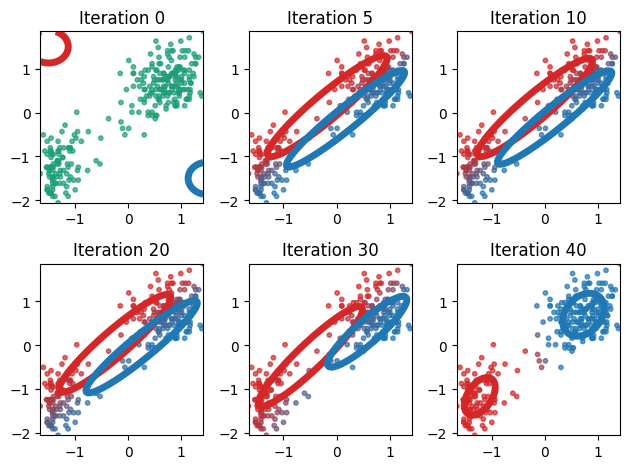

In [17]:
gaus_mix_plot()

## Примеры. Разделение смеси распределений. Кластеризация с помощью смеси нормальных распределений.


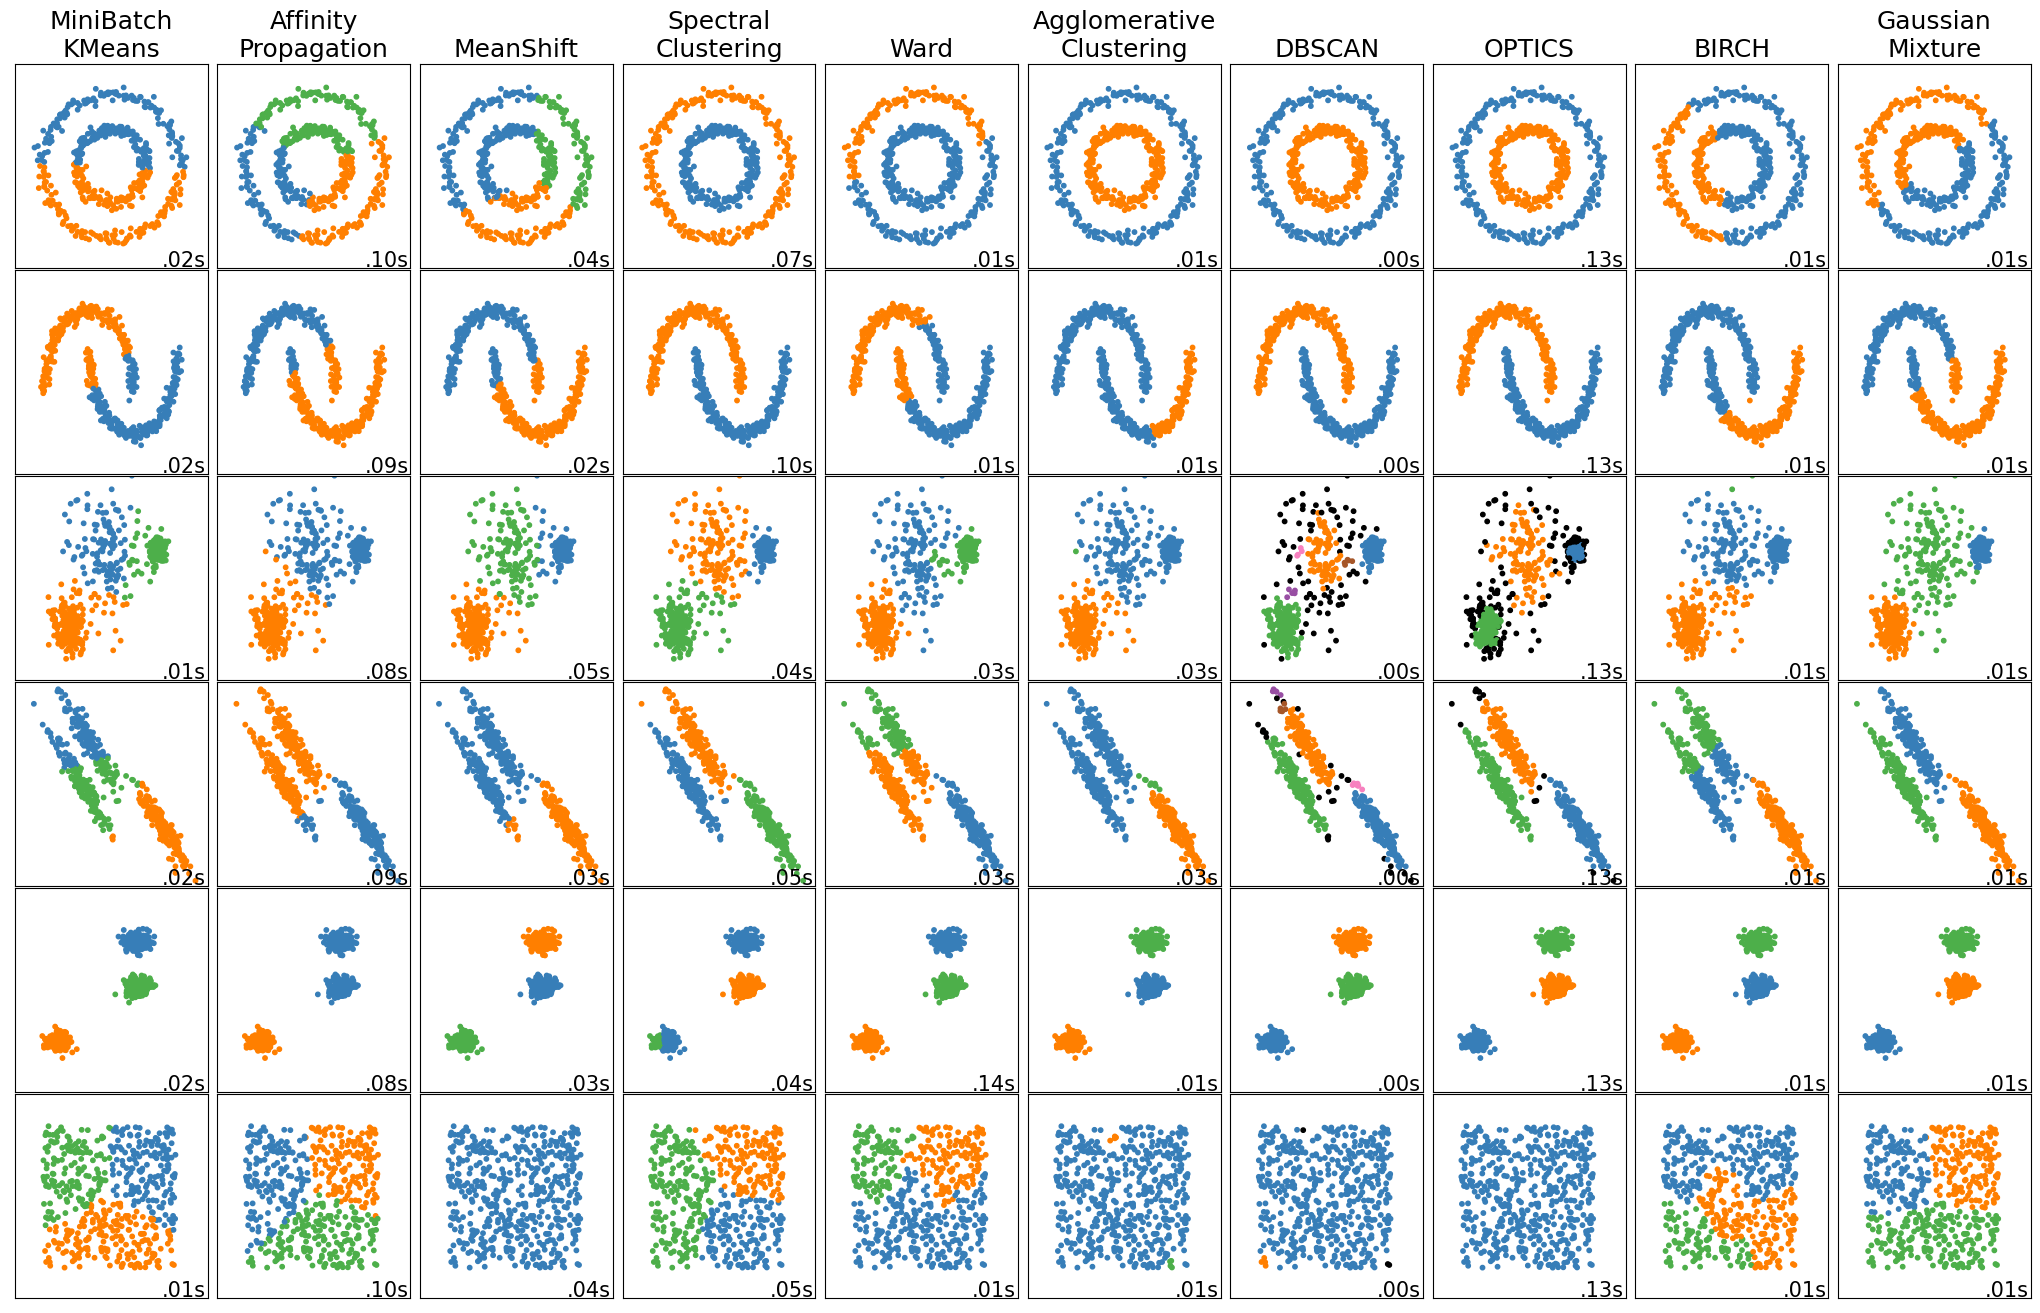

## Примеры. PCA
tbc.
